# Importing Libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Analysing Data

In [6]:
df=pd.read_csv(r"D:\research project\archive (1)\A_Z Handwritten Data.csv")

In [7]:
#(372450, 785)
df.shape

(372450, 785)

In [8]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

In [9]:
data_array.shape

(372450, 785)

In [10]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [11]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372450,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


<BarContainer object of 26 artists>

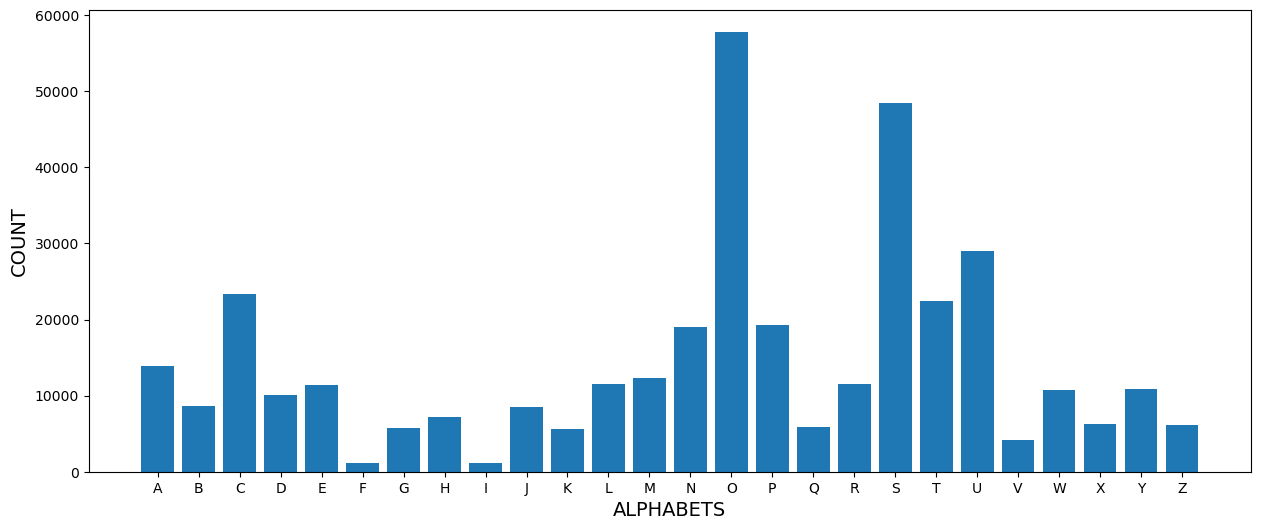

In [12]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

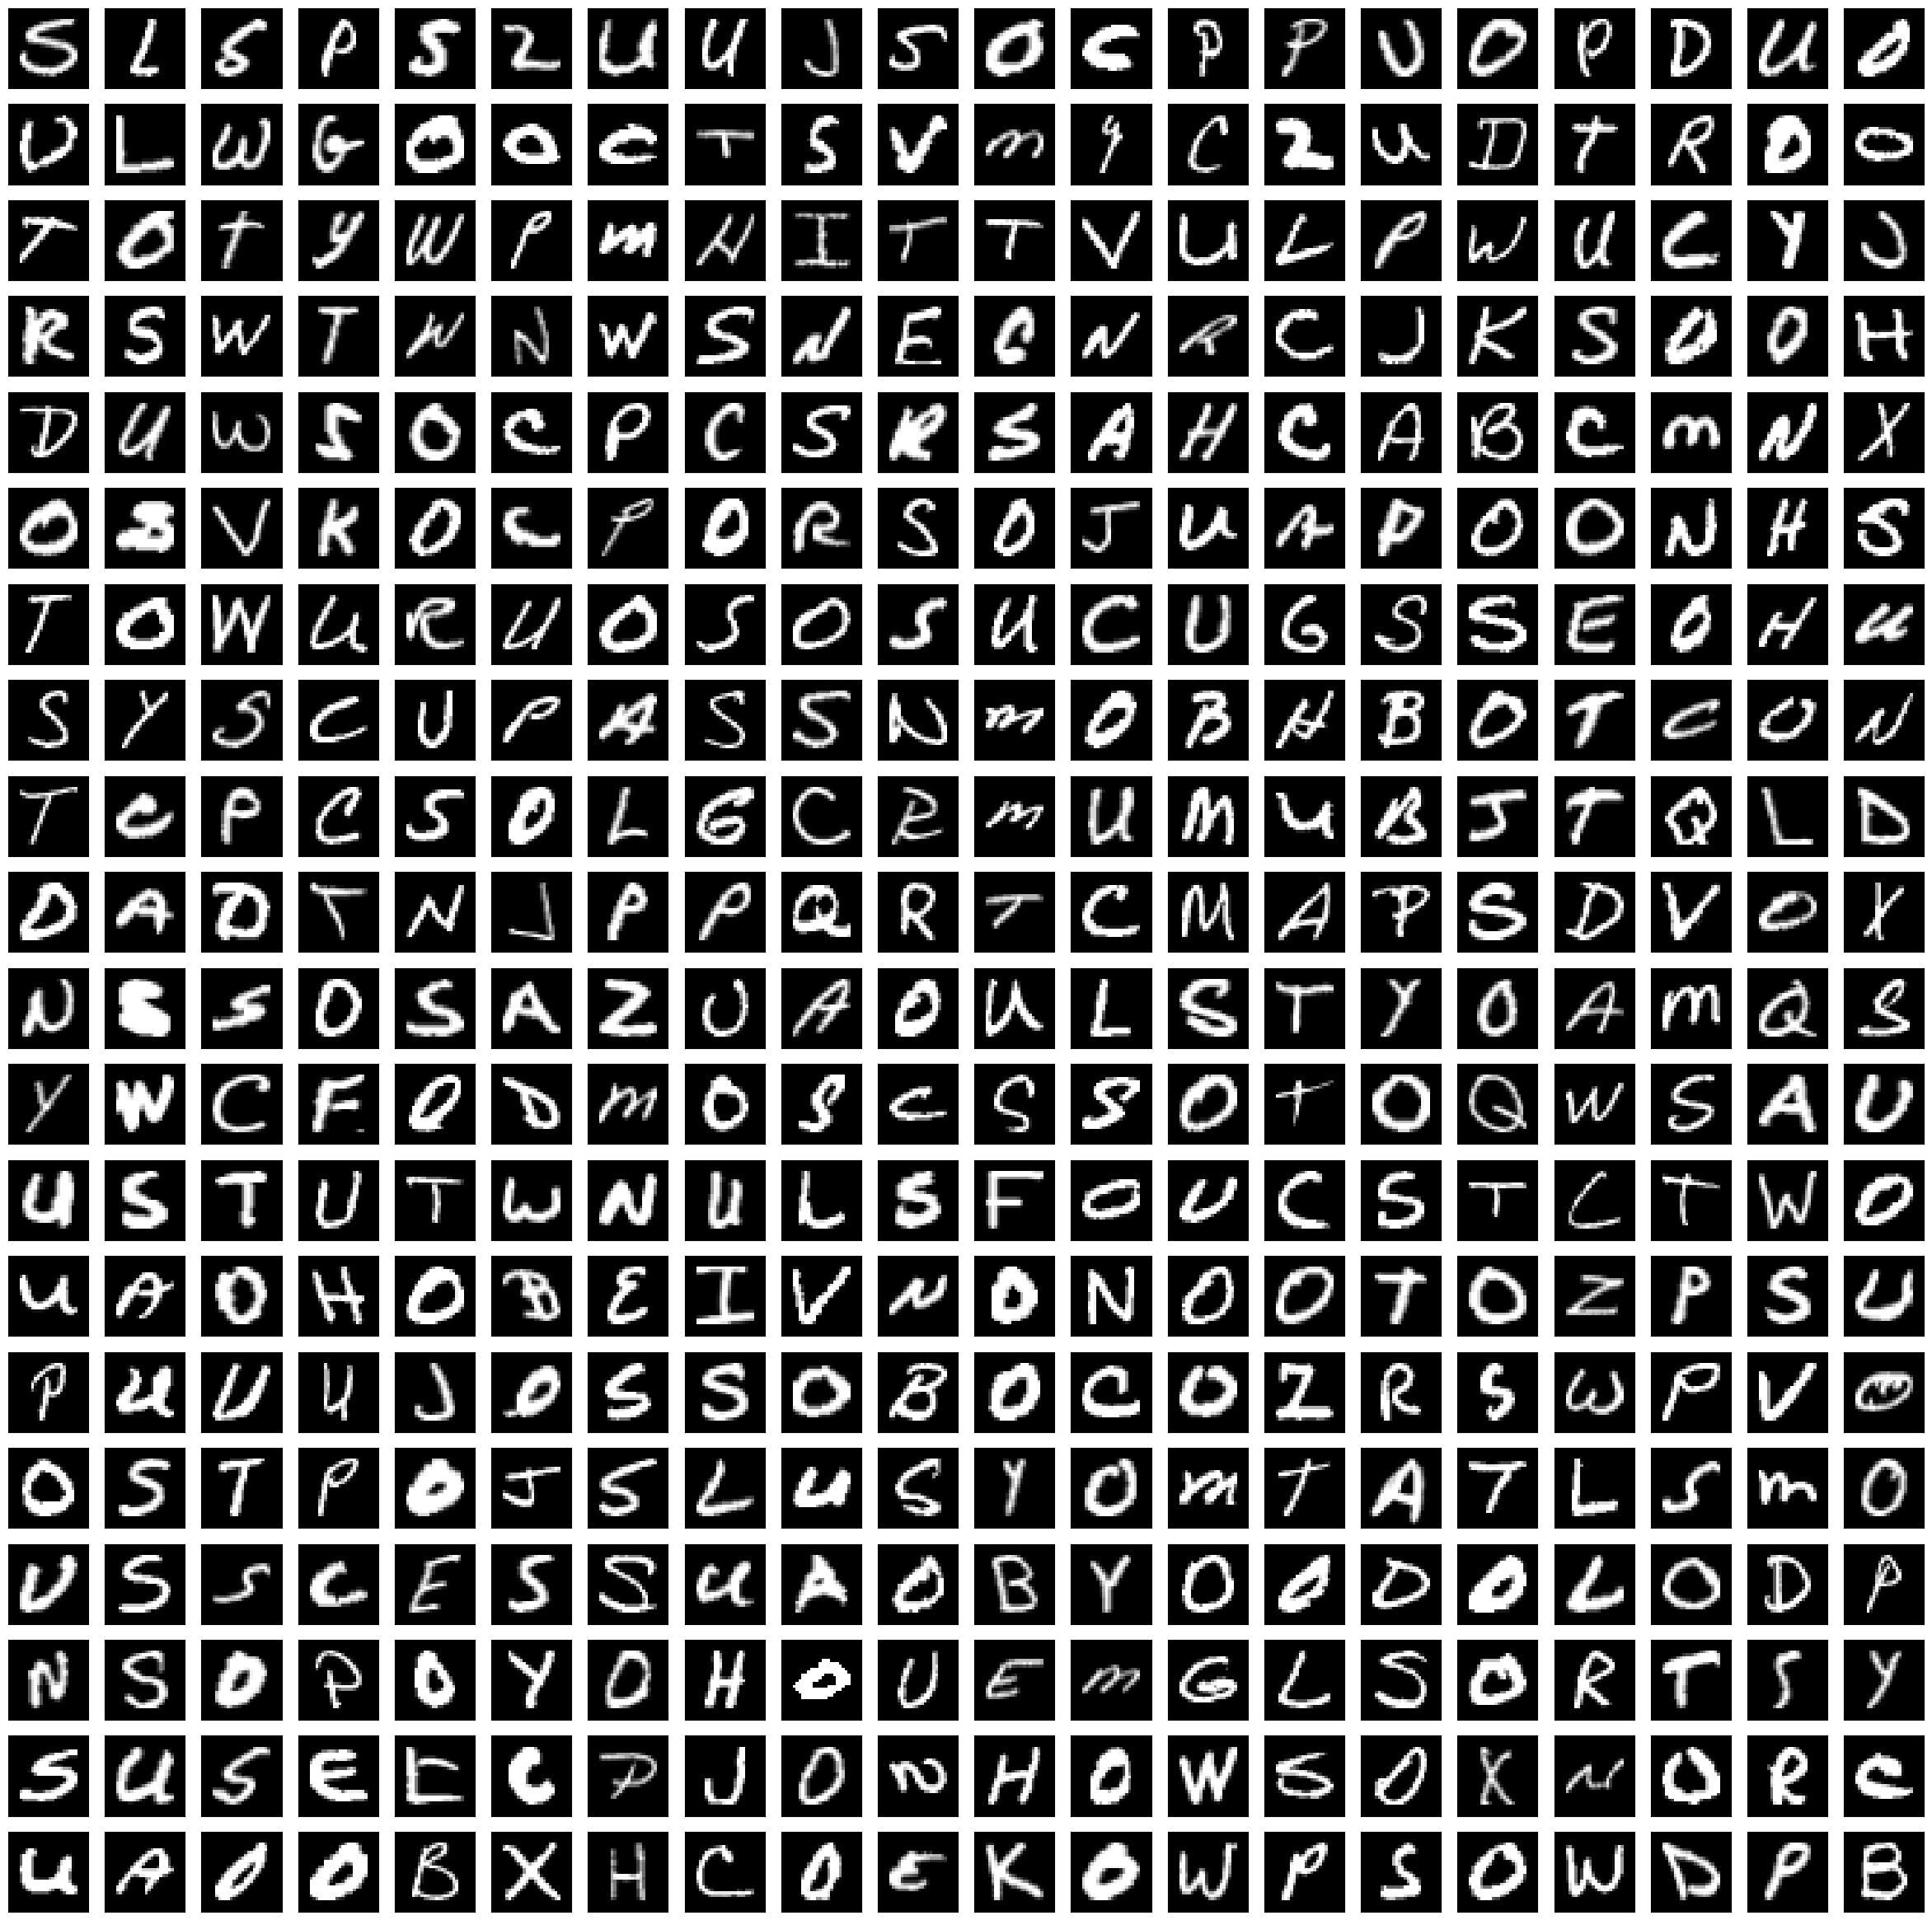

In [13]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a    

In [14]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
x=x.reshape(372450,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.01)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368725, 28, 28, 1)
(3725, 28, 28, 1)
(368725,)
(3725,)


# Model Building

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD

In [19]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                     

In [ ]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

In [ ]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

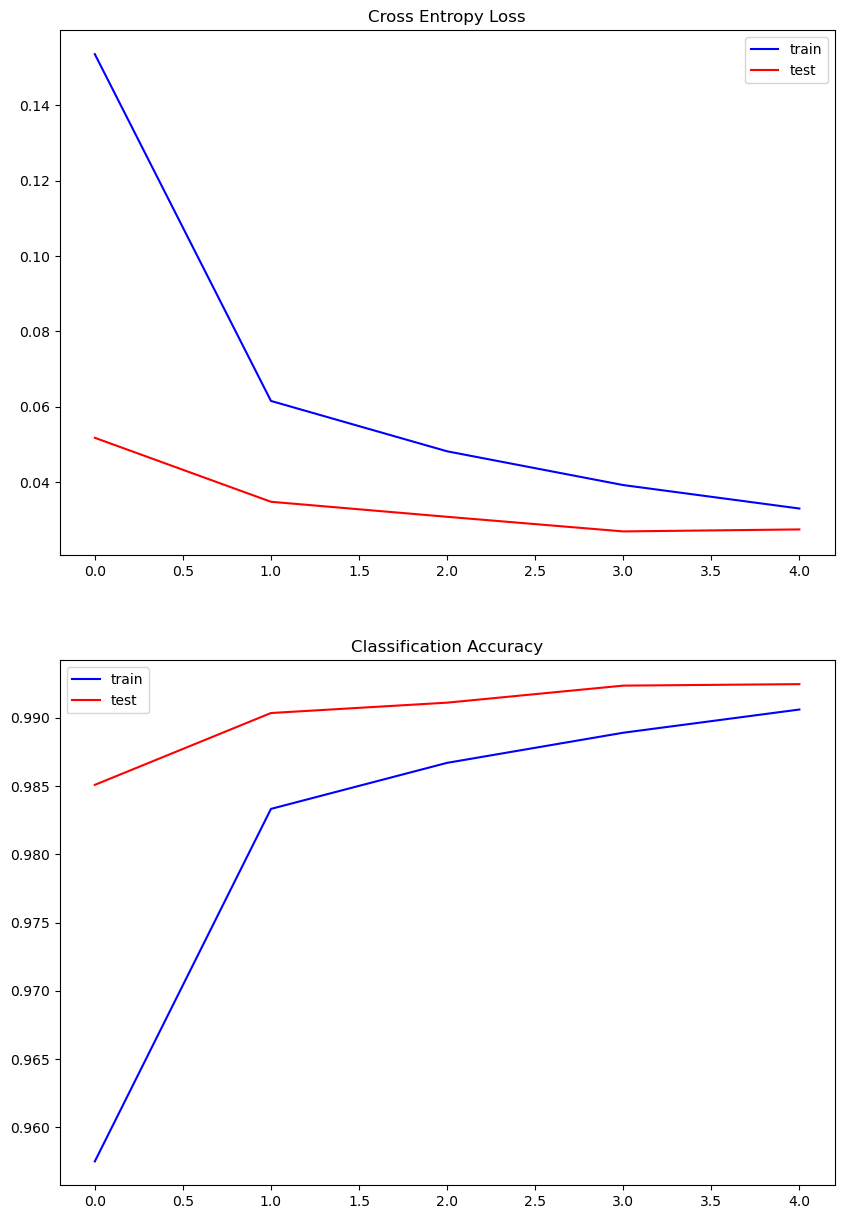

In [17]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [18]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 [==============================] - 5s 38ms/step - loss: 0.0418 - accuracy: 0.9903
Test Acuracy is : 99.03
Test Loss is : 0.04


In [19]:
model.save('Alphabet_Recognition')

INFO:tensorflow:Assets written to: Alphabet_Recognition\assets


INFO:tensorflow:Assets written to: Alphabet_Recognition\assets


In [20]:
model=tf.keras.models.load_model('Alphabet_Recognition')

In [21]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

117/117 [==============================] - 5s 40ms/step - loss: 0.0418 - accuracy: 0.9903
[0.04178136587142944, 0.9903355836868286]
Test Acuracy is : 99.03
Test Loss is : 0.04


# Evaluating On Test Dataset

In [22]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 [==============================] - 0s 34ms/step


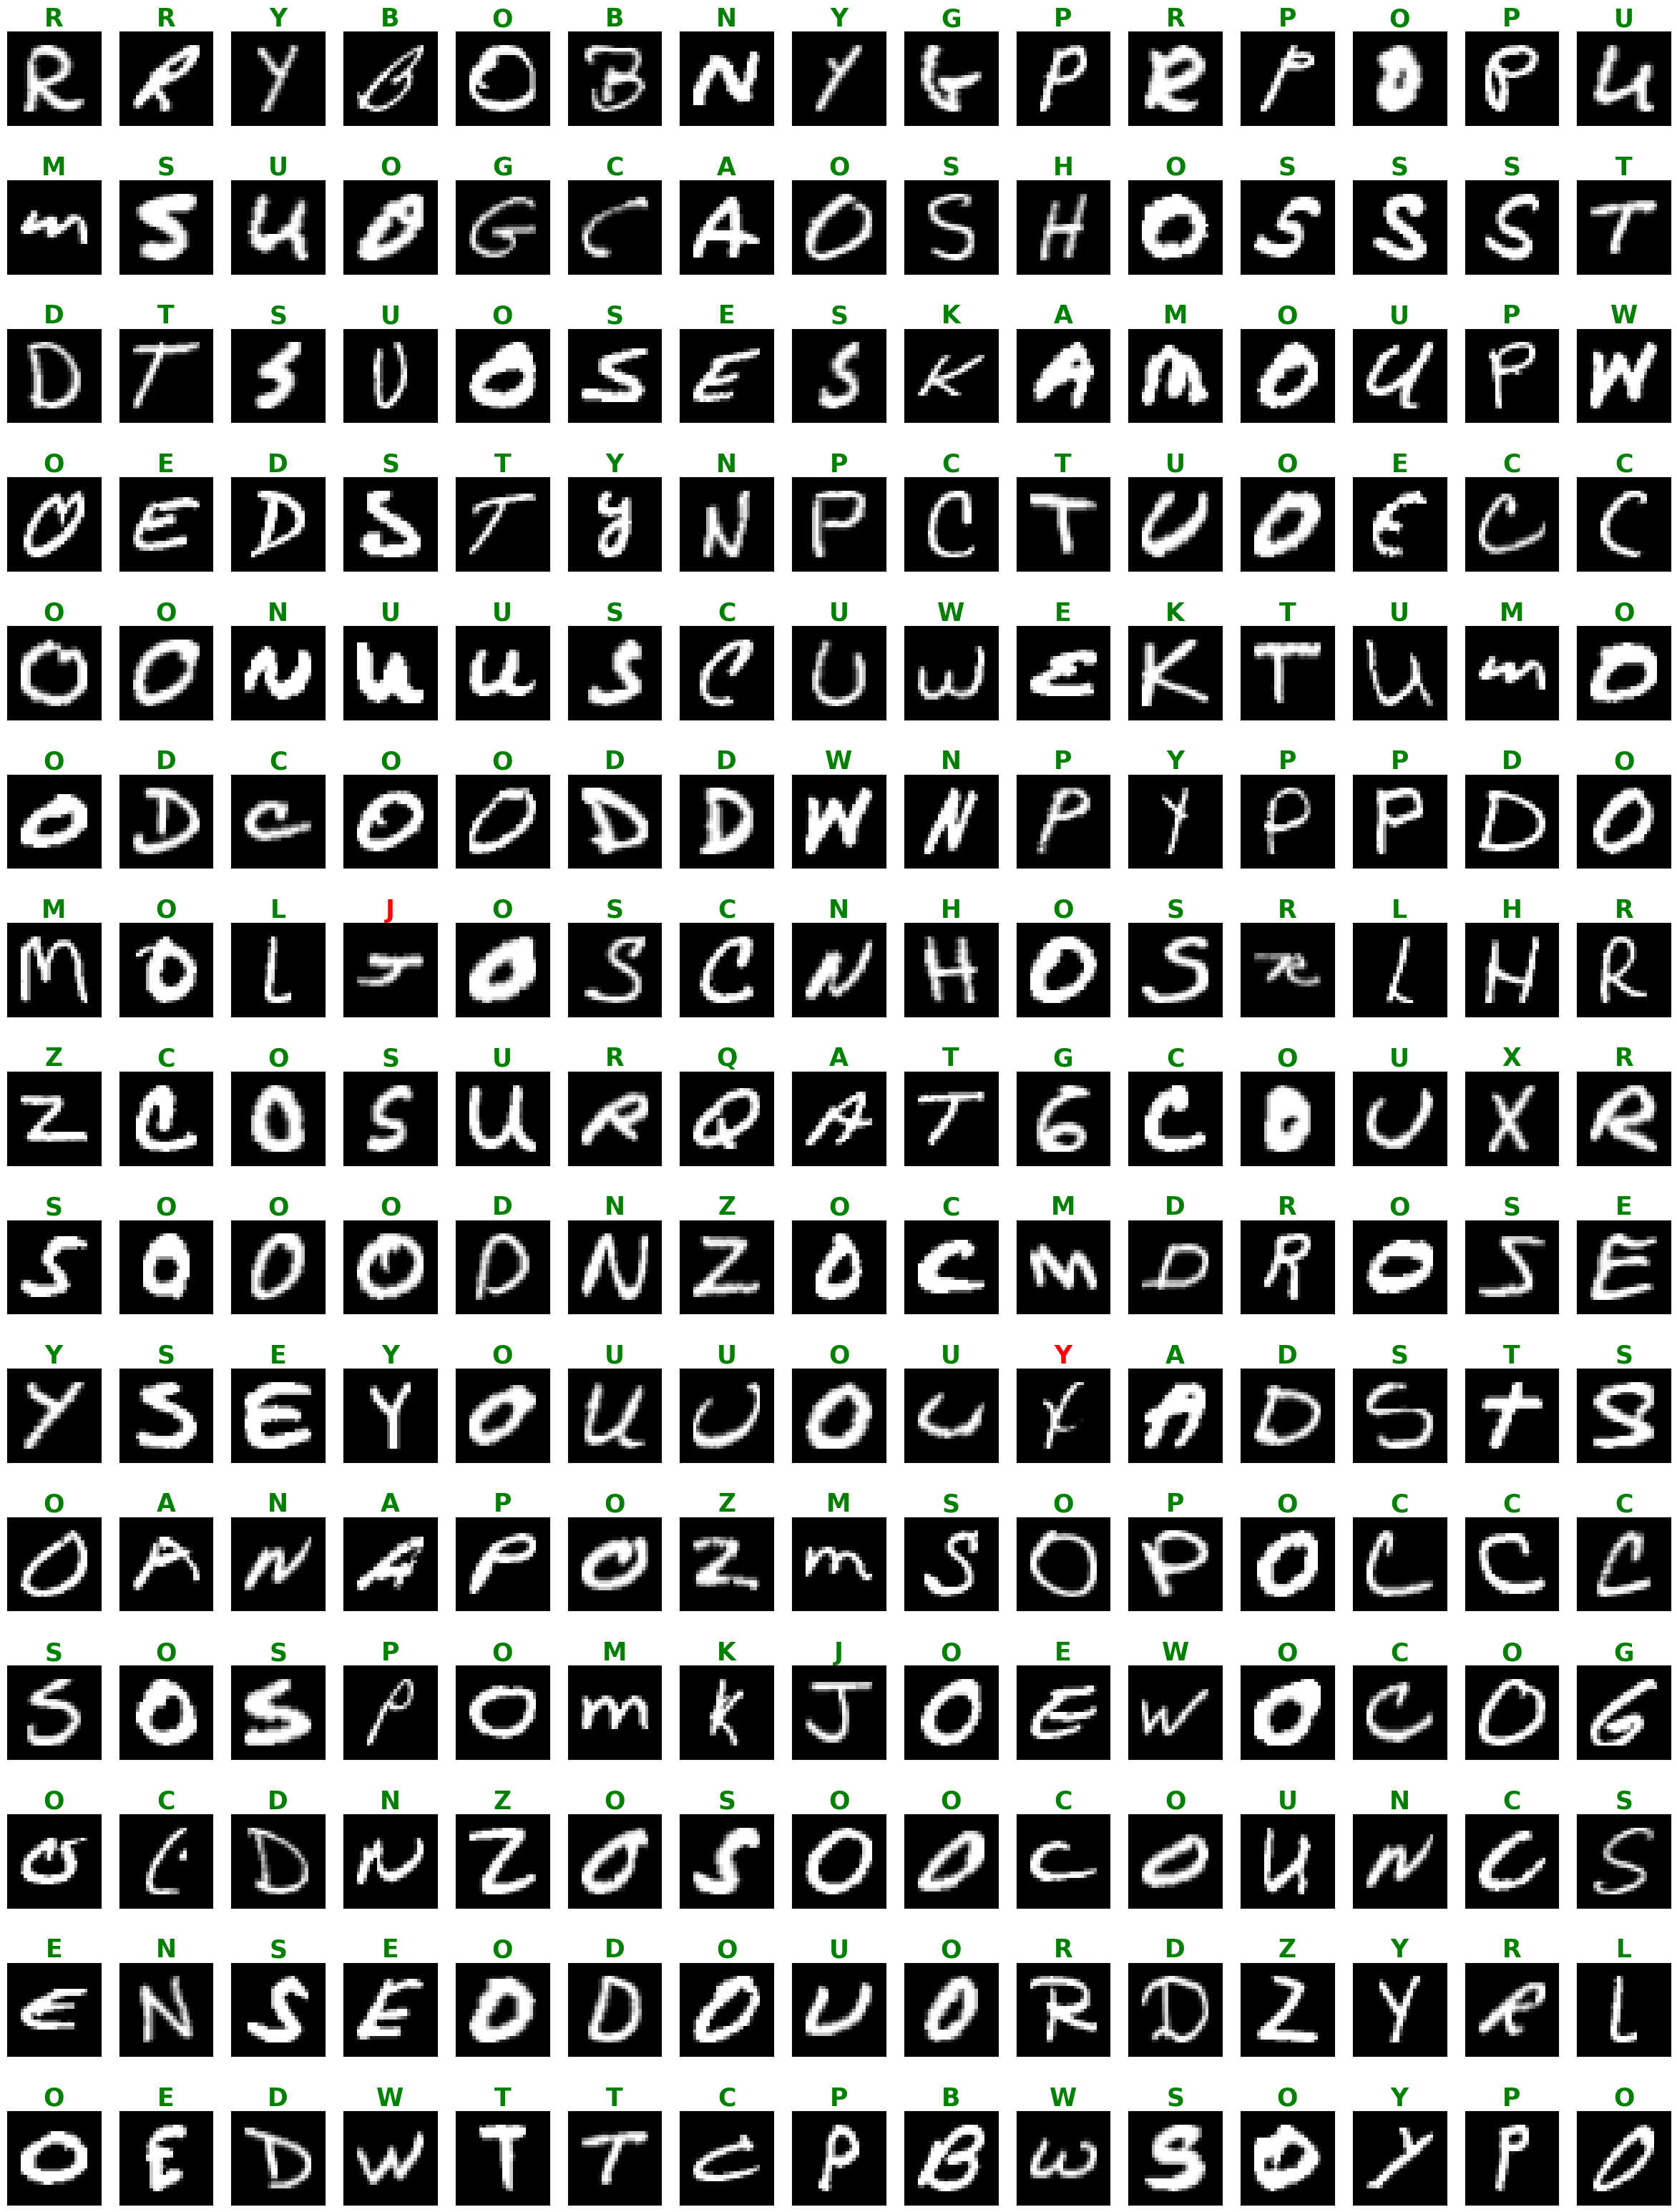

In [23]:
test_images()

# Test your Image

In [9]:
# Import necessary libraries
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load the model first
model = tf.keras.models.load_model('Alphabet_Recognition')


In [5]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [11]:
def alphabet_recognize(filepath):
    image = cv2.imread(filepath)
    blur_image = cv2.medianBlur(image, 7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)

    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                            key=lambda b: b[1][0], reverse=False))

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(blur_image, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        digit = thresh[y:y+h, x:x+w]

        resized_digit = cv2.resize(digit, (18, 18))

        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        preprocessed_digits.append(padded_digit)

    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image", color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr = plt.figure(figsize=(len(inp), 4))
    i = 1
    alphabets = []
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred = alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1, len(inp), i)
        i += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred, color='green', fontsize=18, fontweight="bold")
    print("The Recognized Alphabets are:", *alphabets)

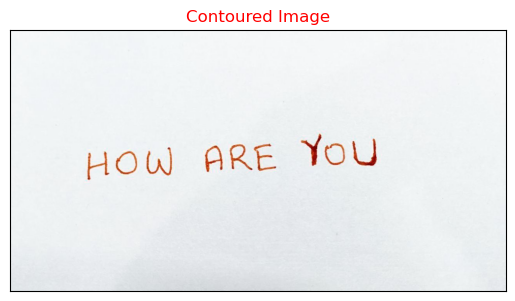

1/1 [==============================] - 0s 35ms/step
The Recognized Alphabets are: H O W A R E Y O U


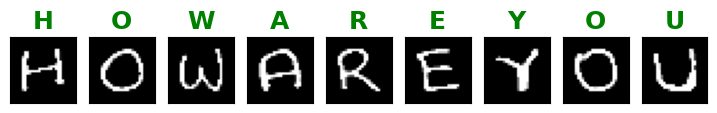

In [25]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\2.jpg")

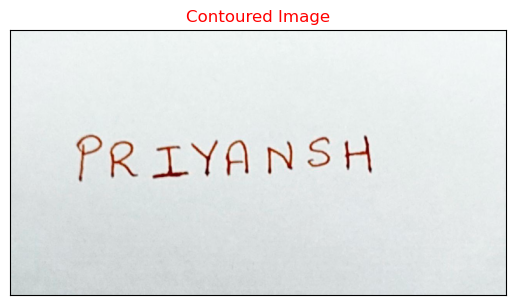

1/1 [==============================] - 0s 39ms/step
The Recognized Alphabets are: P R I Y A N S H


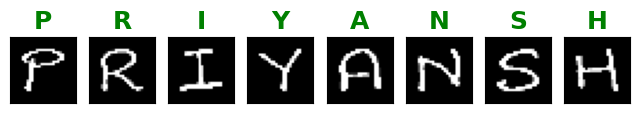

In [22]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\3.jpg")

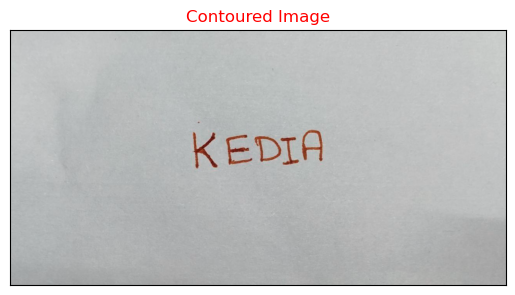

1/1 [==============================] - 0s 40ms/step
The Recognized Alphabets are :  K E D I A


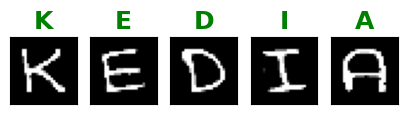

In [31]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\4.jpg")

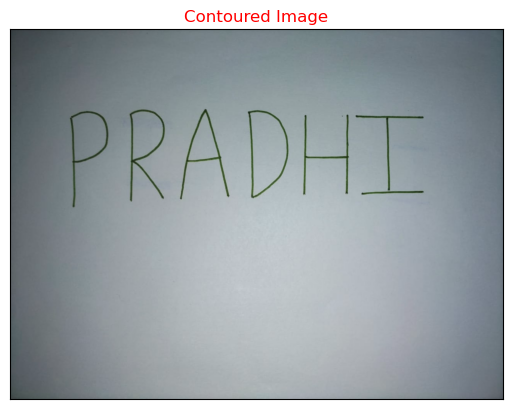

1/1 [==============================] - 0s 34ms/step
The Recognized Alphabets are :  P R A D H I


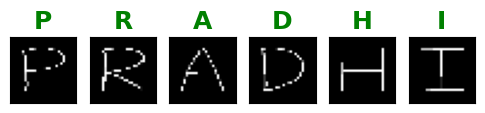

In [33]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\7.jpg")

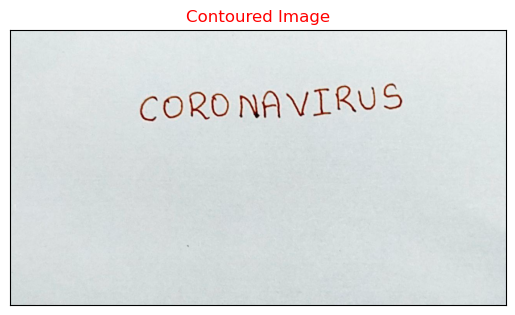

1/1 [==============================] - 0s 42ms/step
The Recognized Alphabets are: C O R O N A V I R U S


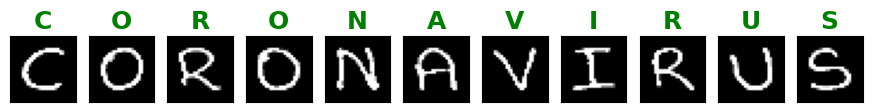

In [23]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\6.jpg")

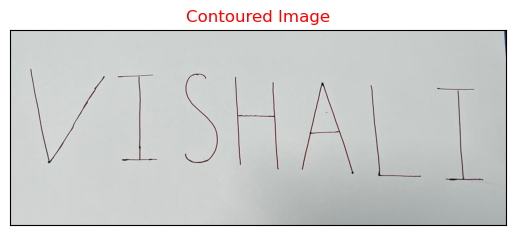

1/1 [==============================] - 0s 41ms/step
The Recognized Alphabets are: O J P Y O O D D O D D Q E O O O B O O O T


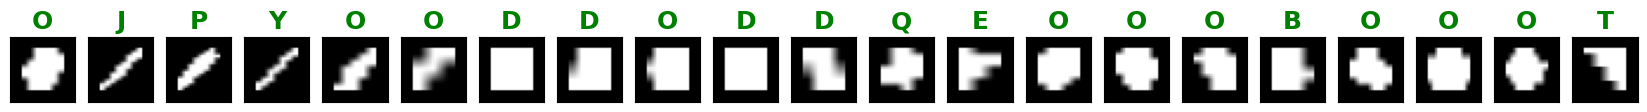

In [27]:
alphabet_recognize(r"D:\research project\Handwritten-Alphabets-Recognition-master\Handwritten-Alphabets-Recognition-master\18.jpg")